# EE 445 Final Project (Part 3): Modeling effectiveness of government response
Nicholas Yama, Spring 2020

## Project goal

At the time of writing (07 May 2020) the United States is beginning to see the number of cases slowing, resulting in increase in desire by a vocal minority to return to normal operations. This would involve the uplifing of wide-scale quarantine and stay-at-home orders, of which the evidence indicates has done significant good in slowing the spread of infections. Many arguments are being levied against the effectiveness of these restrictions which are often of dubious scientific merit.

The effectiveness of the government response has varied between states in curbing the number of cases and, due to the lack of national policy from the federal government, will likey be exacerbated as individual states begin to relax these measures. The goal of this project is to model the effectiveness of the government's response at a state level in terms of initial growth rates of the infection.

## Parameters

The number of infected individuals $N$ in its early stages generally can be modeled by an exponential curve

$$N=\exp(r(t-t_0))$$

where $r$ is the growth rate, $t$ is the time, and $t_0$ is the time until the first infection. The growth rate $r$ can then be determined by a linear regression on $\ln(N) = r(t - t_0)$.

This growth rate $r$ will be predicted using a linear regression-type network for the first 6 weeks starting March 1st (a day later the US would reach the first confirmed 100 cases).

The parameters of interest include:
1. The testing rate integrated weekly (so the number of tests administered from March 1 to a given week) normalized by the population (# tests adminstered/population, for 6 weeks).
2. Time from March 1 to declare a "state of emergency"
3. Time from March 1 to issue a stay-at-home order (state level)
4. Maximum number of persons at a gathering (in cases where a distinction is made between private and public gatherings, the maximum is taken)
5. Travel restrictions (1 = none, 2 = partial, 3 = mandatory).
6. School closures (1 = none, 2 = partial, 3 = all).
7. Daycare closures (1 = none, 2 = partial, 3 = all).
8. Restauraunts closures (1 = none, 2 = partial, 3 = all).
8. Non-essential retail closures (1 = none, 2 = partial, 3 = all).
9. Governor political affiliation (1 = democrat, 2 = republican).
10. Population density (per square mile, control parameter).

When parameters associated with time of response were not achieved within the time frame provided (eg. no stay at home order issued within the 6 weeks) a value of 50 is assigned (greater than maximal value of 42).

Each data point will represent an individual state. Only the 50 states and the District of Columbia will be considered, territories of the US such as American Samoa and Puerto Rico will not be used.

### Data sources
[1] Target data to calculate the growth rate of cases, and the testing data was obtained via the COVID Tracking project: https://covidtracking.com/. The data was collected on May 06 (but data was only used up to April 12 so the collection date does not matter).

[2] Parameters 2-9 were obtained from the Wikipedia page: https://en.wikipedia.org/wiki/U.S._state_and_local_government_response_to_the_COVID-19_pandemic, I processed the data in Microsoft Excel, using a search and replace on terms corresponding to the values above.

[3] Governor partisanship (parameter 9) was found: https://en.wikipedia.org/wiki/List_of_United_States_governors

[4] State population statistics was found from the US 2010 Census projections for 2019. The full dataset can be found: https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html

# Loading data
The data is being loaded from my Github repository. The data was initially processed from the sources above using the notebook located: https://github.com/nyama8/EE-445-Final-Project/blob/master/Part%202/FinalProject_part2.ipynb

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load parameters dataset
url = 'https://raw.githubusercontent.com/nyama8/EE-445-Final-Project/master/Processed%20data/sampledata.csv'
datadf = pd.read_csv(url, error_bad_lines=False)
datadf.describe()

,Tests 1,Tests 2,Tests 3,Tests 4,Tests 5,Tests 6,Tests 7,density,emergency,quarantine,gatherings,travel,school,daycares,restauraunts,retail,party
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0,51.000000,51.000000,51.000000,51.000000
mean,0.003220,0.145489,1.380985,8.824113,30.812967,63.724578,102.464746,412.058824,8.921569,29.941176,11.588235,1.862745,3.0,2.764706,2.941176,2.725490,1.490196
std,0.020440,0.454149,3.618019,11.500424,27.779183,54.629108,90.068199,1536.591050,3.632317,9.213928,13.661883,0.916943,0.0,0.586114,0.310597,0.634931,0.543049
min,0.000000,0.000000,0.014126,0.420049,2.752207,6.704623,11.529469,1.000000,-1.000000,18.000000,1.000000,1.000000,3.0,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.006828,0.246191,2.712900,15.046188,37.274537,58.549733,47.500000,7.500000,23.000000,1.000000,1.000000,3.0,3.000000,3.000000,3.000000,1.000000
50%,0.000000,0.047543,0.412394,6.138395,25.719804,49.315151,79.901797,106.000000,10.000000,27.000000,10.000000,2.000000,3.0,3.000000,3.000000,3.000000,2.000000
75%,0.000000,0.121059,1.170444,9.018394,38.097159,69.805266,114.818142,226.500000,12.000000,32.500000,10.000000,3.000000,3.0,3.000000,3.000000,3.000000,2.000000
max,0.145767,3.226572,25.359516,60.308136,170.019023,379.349636,640.796553,11011.000000,15.000000,50.000000,50.000000,3.000000,3.0,3.000000,3.000000,3.000000,2.000000


In [3]:
# Load target dataset
url = 'https://raw.githubusercontent.com/nyama8/EE-445-Final-Project/master/Processed%20data/sampletarget.csv'
targetdf = pd.read_csv(url, error_bad_lines=False)
targetdf.describe()

,rate
count,51.000000
mean,0.216806
std,0.035466
min,0.134223
25%,0.190891
50%,0.219613
75%,0.239307
max,0.299372


In [4]:
data = datadf.to_numpy()
target = targetdf.to_numpy()

# Modeling with a feed-forward network

As an intial pass at this problem, I used linear regression to model the relation between the parameters and infection rate $r$. This would represent a network with 13 input nodes and a single output node with a mean squared error loss function. Here I use a more advanced feed-forward network approach to address the problem.

In the following approaches, I used the tutorial available here: https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/, to help with syntax and how to actually implement the network.


## Recreating explicit linear regression with a network
Previously I used the LinearRegression() function which determines the optimal estimator directly. Here I implement a network with the same topology that approximates the same function.

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [6]:
# Define the network model
def base_model():
    model = Sequential()
    model.add(Dense(1, input_dim=17, kernel_initializer='normal'))
    
    model.layers[0].set_weights([np.zeros([17,1])+0.01, np.array([0.00])])

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [7]:
# Generate test and training data splits
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=445)

# Train the network
baseNetwork = base_model()

baseNetwork.fit(X_train, y_train, epochs=150, batch_size=5, shuffle=False)













Epoch 1/150
34/34 [==============================] - 0s 13ms/step - loss: 402.6320
Epoch 2/150
34/34 [==============================] - 0s 240us/step - loss: 161.3381
Epoch 3/150
34/34 [==============================] - 0s 294us/step - loss: 57.0778
Epoch 4/150
34/34 [==============================] - 0s 323us/step - loss: 13.3710
Epoch 5/150
34/34 [==============================] - 0s 328us/step - loss: 2.5354
Epoch 6/150
34/34 [==============================] - 0s 292us/step - loss: 2.6779
Epoch 7/150
34/34 [==============================] - 0s 333us/step - loss: 2.8390
Epoch 8/150
34/34 [==============================] - 0s 302us/step - loss: 1.5361
Epoch 9/150
34/34 [==============================] - 0s 330us/step - loss: 0.4017
Epoch 10/150
34/34 [==============================] - 0s 311us/step - loss: 0.0816
Epoch 11/150
34/34 [==============================] - 0s 277us/step - loss: 0.1194
Epoch 12/150
34/34 [==============================] - 0s 290us/step - loss: 0.1

In [8]:
test_loss = baseNetwork.evaluate(X_test, y_test, verbose=0)
print('The loss on the testing set:', test_loss)

The loss on the testing set: 0.0031954790465533733


In [20]:
# Compare to exact predictor
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True).fit(X_train, y_train)
pred_values = reg.predict(X_test)
mse = np.sqrt( np.mean((pred_values - y_test) ** 2 ) )
print('The loss using sklearn method:', mse)

The loss using sklearn method: 0.2801253106965247


## A single hidden layer
As a first pass at a more complex topology, I will use a network with a single hidden layer smaller than the input data (which is 17 dimensional). The hidden layer will arbitrarily be chosen to be of size 8.

The motivation for this structure is as follows:
1. The initial attempt using linear regression considered all parameters individually. However, the effectiveness of these measures are not independent of each other (eg. high testing rates will not do anything without some quarantine measures). 
2. The hidden layer might be able to capture in essence the idea that the effectiveness is dependent on several features together.
3. The hidden layer could be expected to be smaller than the input since not all combinations are significant there are many combinations of parameters avaialble.

I will use a sigmoid activation function in the hidden layer and again the mean squared error loss function. The sigmoid activation seems to be a decent choice since the hope is that the hidden layer will capture some essence of combinations of the features, so the normalizing effect should help the output neuron be less biased (not really sure if this is a valid argument). Additonally, the data is not too extreme in value and the dataset is relatively small so it shouldn't have too many convergence issues.

As a first attempt, I will use the Adam optimizer because it is popular and I don't quite understand all the parameters available in SGD.

In [10]:
def thin_model():
    model = Sequential()
    model.add(Dense(8, input_dim=17, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    # Initialize weights
    model.layers[0].set_weights([np.zeros([17,8])+0.01, np.zeros([8,])])
    model.layers[1].set_weights([np.zeros([8,1])+0.01, np.array([0.00])])
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [11]:
thinNetwork = thin_model()

thinNetwork.fit(X_train, y_train, epochs=150, batch_size=5, shuffle=False)

Epoch 1/150
34/34 [==============================] - 1s 19ms/step - loss: 0.0136
Epoch 2/150
34/34 [==============================] - 0s 295us/step - loss: 0.0037
Epoch 3/150
34/34 [==============================] - 0s 280us/step - loss: 0.0011
Epoch 4/150
34/34 [==============================] - 0s 340us/step - loss: 0.0016
Epoch 5/150
34/34 [==============================] - 0s 354us/step - loss: 0.0018
Epoch 6/150
34/34 [==============================] - 0s 449us/step - loss: 0.0014
Epoch 7/150
34/34 [==============================] - 0s 358us/step - loss: 0.0013
Epoch 8/150
34/34 [==============================] - 0s 313us/step - loss: 0.0012
Epoch 9/150
34/34 [==============================] - 0s 362us/step - loss: 0.0012
Epoch 10/150
34/34 [==============================] - 0s 325us/step - loss: 0.0012
Epoch 11/150
34/34 [==============================] - 0s 275us/step - loss: 0.0012
Epoch 12/150
34/34 [==============================] - 0s 333us/step - loss: 0.0012
Epoch 13/150
3

In [12]:
test_loss = thinNetwork.evaluate(X_test, y_test, verbose=0)
print('The loss on the testing set:', test_loss)

The loss on the testing set: 0.0014621663140133023


Evidently, at least for this particular training and testing set, the single layer thing network did a significantly better job on predicting the output than the base model.

## Two hidden layers
Adding additional complexity, I will add a second hidden layer, also of size 8.

The hope was that the first hidden layer in the previous attempt might capture the essence of "combinations" of the parameters being significant. However, not all combinations are trivial. For instance, high early testing rates might be significant only if quarantine measures are enacted, but quarantine measures could be enacted without high testing rates and still be effective. Additional complexities like this might hopefully be captured by the addition of a second hidden layer.

I will use the same parameters for the second layer as well (at least initially).

In [13]:
def deep_model():
    model = Sequential()
    model.add(Dense(8, input_dim=17, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(8, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.layers[0].set_weights([np.zeros([17,8])+0.01, np.zeros([8,])])
    model.layers[1].set_weights([np.zeros([8,8])+0.01, np.zeros([8,])])
    model.layers[2].set_weights([np.zeros([8,1])+0.01, np.array([0.00])])
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [14]:
deepNetwork = deep_model()

deepNetwork.fit(X_train, y_train, epochs=150, batch_size=5, shuffle=False)

Epoch 1/150
34/34 [==============================] - 1s 26ms/step - loss: 0.0262
Epoch 2/150
34/34 [==============================] - 0s 366us/step - loss: 0.0155
Epoch 3/150
34/34 [==============================] - 0s 363us/step - loss: 0.0078
Epoch 4/150
34/34 [==============================] - 0s 358us/step - loss: 0.0033
Epoch 5/150
34/34 [==============================] - 0s 355us/step - loss: 0.0014
Epoch 6/150
34/34 [==============================] - 0s 385us/step - loss: 0.0011
Epoch 7/150
34/34 [==============================] - 0s 385us/step - loss: 0.0013
Epoch 8/150
34/34 [==============================] - 0s 320us/step - loss: 0.0014
Epoch 9/150
34/34 [==============================] - 0s 388us/step - loss: 0.0013
Epoch 10/150
34/34 [==============================] - 0s 373us/step - loss: 0.0012
Epoch 11/150
34/34 [==============================] - 0s 372us/step - loss: 0.0012
Epoch 12/150
34/34 [==============================] - 0s 426us/step - loss: 0.0012
Epoch 13/150
3

In [15]:
test_loss = deepNetwork.evaluate(X_test, y_test, verbose=0)
print('The loss on the testing set:', test_loss)

The loss on the testing set: 0.0012646199902519584


This time around, the additonal layer did not significantly improve the loss when a signmoid activation function is implemented. Instead trying a RELU activation in the second layer:

In [16]:
def deep_model():
    model = Sequential()
    model.add(Dense(8, input_dim=17, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.layers[0].set_weights([np.zeros([17,8])+0.01, np.zeros([8,])])
    model.layers[1].set_weights([np.zeros([8,8])+0.01, np.zeros([8,])])
    model.layers[2].set_weights([np.zeros([8,1])+0.01, np.array([0.00])])
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

deepNetwork = deep_model()

deepNetwork.fit(X_train, y_train, epochs=150, batch_size=5, shuffle=False)

Epoch 1/150
34/34 [==============================] - 1s 28ms/step - loss: 0.0419
Epoch 2/150
34/34 [==============================] - 0s 390us/step - loss: 0.0329
Epoch 3/150
34/34 [==============================] - 0s 367us/step - loss: 0.0227
Epoch 4/150
34/34 [==============================] - 0s 344us/step - loss: 0.0126
Epoch 5/150
34/34 [==============================] - 0s 351us/step - loss: 0.0049
Epoch 6/150
34/34 [==============================] - 0s 414us/step - loss: 0.0014
Epoch 7/150
34/34 [==============================] - 0s 459us/step - loss: 0.0013
Epoch 8/150
34/34 [==============================] - 0s 442us/step - loss: 0.0018
Epoch 9/150
34/34 [==============================] - 0s 404us/step - loss: 0.0015
Epoch 10/150
34/34 [==============================] - 0s 419us/step - loss: 0.0013
Epoch 11/150
34/34 [==============================] - 0s 422us/step - loss: 0.0012
Epoch 12/150
34/34 [==============================] - 0s 429us/step - loss: 0.0012
Epoch 13/150
3

In [17]:
test_loss = deepNetwork.evaluate(X_test, y_test, verbose=0)
print('The loss on the testing set:', test_loss)

The loss on the testing set: 0.001012160792015493


Interestingly, the RELU loss function seems to improve the loss ever so slightly more... Perhaps this is due to the fact that the first layer can pick out the significant combinations (normalized) and the second can evaluate the relative significance between them. Regardless, the improvement is not that significant.

# Comparison of performance

Here we compare the performance of the four models.

IMPORTANT: The following cells are dependent on the networks being trained on the test split defined in the earlier cells by

````
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=445)
````

The networks are assumed to be trained for the next section to be accurate.


### Comparison of a single test-training split

In [24]:
# Generate test and training data splits
#X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=445)

# Get predicted values for networks
base_pred = baseNetwork.predict(X_test)
thin_pred = thinNetwork.predict(X_test)
deep_pred = deepNetwork.predict(X_test)

# Predicted values for linear regression
reg = LinearRegression(fit_intercept=True).fit(X_train, y_train)
lnrg_pred = reg.predict(X_test)

# Trivial predictor as mean of training data
triv_pred = np.ones([len(y_test), 1]) * np.mean(y_train)

# Showing predictions
predictions = np.stack([y_test.reshape(-1), base_pred.reshape(-1), thin_pred.reshape(-1), 
                        deep_pred.reshape(-1), lnrg_pred.reshape(-1), triv_pred.reshape(-1)])

pred = pd.DataFrame(predictions.T, columns=['Actual', 'base', 'thin', 'deep', 'LinReg', 'Trivial'])
pred

,Actual,base,thin,deep,LinReg,Trivial
0,0.196563,0.216993,0.238485,0.238196,0.284242,0.215838
1,0.203043,0.229985,0.212877,0.209964,0.224638,0.215838
2,0.219613,0.236922,0.215244,0.214599,0.222883,0.215838
3,0.269133,0.220646,0.244147,0.243613,0.336534,0.215838
4,0.177154,0.268167,0.218040,0.216646,0.208369,0.215838
5,0.215174,0.190213,0.207007,0.207519,0.213413,0.215838
6,0.256654,0.211731,0.235224,0.235248,0.249962,0.215838
7,0.134223,-0.024845,0.017704,0.056105,-1.010888,0.215838
8,0.201903,0.229205,0.195365,0.194550,0.165244,0.215838
9,0.285952,0.238172,0.228763,0.227901,0.261675,0.215838


In [46]:
difference = predictions - predictions[0]

labels = np.zeros(len(y_test))
labels = np.stack([labels, labels+1, labels+2, labels+3, labels+4])

(5, 17)

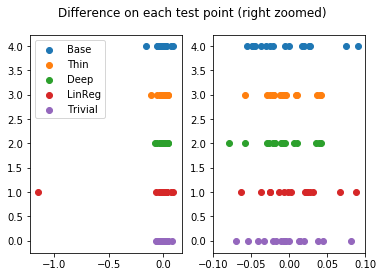

In [62]:
import matplotlib.pyplot as plt

ax1 = plt.subplot(121)
ax1.scatter(difference[1], labels[4], label='Base')
ax1.scatter(difference[2], labels[3], label='Thin')
ax1.scatter(difference[3], labels[2], label='Deep')
ax1.scatter(difference[4], labels[1], label='LinReg')
ax1.scatter(difference[5], labels[0], label='Trivial')
plt.legend()

ax2 = plt.subplot(122)
ax2.scatter(difference[1], labels[4], label='Base')
ax2.scatter(difference[2], labels[3], label='Thin')
ax2.scatter(difference[3], labels[2], label='Deep')
ax2.scatter(difference[4], labels[1], label='LinReg')
ax2.scatter(difference[5], labels[0], label='Trivial')
ax2.set_xlim([-0.1, 0.1])

plt.suptitle('Difference on each test point (right zoomed)')
plt.show()

In [25]:
# Calculate (root) mean squared errors
base_mse = np.sqrt(np.mean((base_pred - y_test) ** 2))
thin_mse = np.sqrt(np.mean((thin_pred - y_test) ** 2))
deep_mse = np.sqrt(np.mean((deep_pred - y_test) ** 2))
lnrg_mse = np.sqrt(np.mean((lnrg_pred - y_test) ** 2))
triv_mse = np.sqrt(np.mean((triv_pred - y_test) ** 2))

RMSE = np.array([base_mse, thin_mse, deep_mse, lnrg_mse, triv_mse])

print('[base_mse, thin_mse, deep_mse, lnrg_mse, triv_mse] =', RMSE)

[base_mse, thin_mse, deep_mse, lnrg_mse, triv_mse] = [0.05652857 0.03823828 0.03181447 0.28012531 0.03621467]


Again, the trivial predictor remains relatively accurate (more so than most other approaches). This is again because the growth rates tended to be very similar although the parameters varied widely.

Interestingly, the performance as characterized by the RMSE as given above is quite different from the losses determined by the Model.evaluate() method. I'm not exactly sure why this difference occurs.

In [69]:
base_eval = baseNetwork.evaluate(X_test, y_test, verbose=0)
thin_eval = thinNetwork.evaluate(X_test, y_test, verbose=0)
deep_eval = deepNetwork.evaluate(X_test, y_test, verbose=0)

compare = np.array([[base_eval, thin_eval, deep_eval], [base_mse, thin_mse, deep_mse]])
compdf = pd.DataFrame(compare.T, index=['base', 'thin', 'deep'], columns=['Calculated', 'Evaluate'])
compdf

,Calculated,Evaluate
base,0.003195,0.056529
thin,0.001462,0.038238
deep,0.001012,0.031814


### Comparing performance on an ensemble of test splits

In [75]:
# This will take a long time to run
lnrg = []
base = []
thin = []
deep = []
triv = []

for i in range(25):
    print('Starting test set number', i)
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33)
    reg = LinearRegression(fit_intercept=True).fit(X_train, y_train)
    
    print('Training base network...')
    baseNetwork = base_model()
    baseNetwork.fit(X_train, y_train, epochs=100, batch_size=5, shuffle=False, verbose=0)

    print('Training thin network...')
    thinNetwork = thin_model()
    thinNetwork.fit(X_train, y_train, epochs=100, batch_size=5, shuffle=False, verbose=0)
    
    print('Training deep network...')
    deepNetwork = deep_model()
    deepNetwork.fit(X_train, y_train, epochs=100, batch_size=5, shuffle=False, verbose=0)
    
    print('Calcuating errors...')
    base_pred = baseNetwork.predict(X_test)
    thin_pred = thinNetwork.predict(X_test)
    deep_pred = deepNetwork.predict(X_test)
    lnrg_pred = reg.predict(X_test)
    
    base_mse = np.sqrt(np.mean((base_pred - y_test) ** 2))
    thin_mse = np.sqrt(np.mean((thin_pred - y_test) ** 2))
    deep_mse = np.sqrt(np.mean((deep_pred - y_test) ** 2))
    lnrg_mse = np.sqrt(np.mean((lnrg_pred - y_test) ** 2))
    triv_mse = np.sqrt(np.mean((np.mean(y_train) - y_test) ** 2))
    
    base = np.append(base, base_mse)
    thin = np.append(thin, thin_mse)
    deep = np.append(deep, deep_mse)
    lnrg = np.append(lnrg, lnrg_mse)
    triv = np.append(triv, triv_mse)
    print('Test set', i, 'complete.\n')

Starting test set number 0
Training base network...
Training thin network...
Training deep network...
Calcuating errors...
Test set 0 complete.

Starting test set number 1
Training base network...
Training thin network...
Training deep network...
Calcuating errors...
Test set 1 complete.

Starting test set number 2
Training base network...
Training thin network...
Training deep network...
Calcuating errors...
Test set 2 complete.

Starting test set number 3
Training base network...
Training thin network...
Training deep network...
Calcuating errors...
Test set 3 complete.

Starting test set number 4
Training base network...
Training thin network...
Training deep network...
Calcuating errors...
Test set 4 complete.

Starting test set number 5
Training base network...
Training thin network...
Training deep network...
Calcuating errors...
Test set 5 complete.

Starting test set number 6
Training base network...
Training thin network...
Training deep network...
Calcuating errors...
Test se

In [76]:
error = np.stack([lnrg, triv, base, thin, deep])

errdf = pd.DataFrame(error.T, columns=['LinReg', 'Trivial', 'Base', 'Thin', 'Deep'])
errdf.describe()

,LinReg,Trivial,Base,Thin,Deep
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.081229,0.035533,0.095360,0.033980,0.033483
std,0.073918,0.003601,0.083533,0.005264,0.004637
min,0.026578,0.029751,0.032261,0.021918,0.022426
25%,0.033802,0.032917,0.046692,0.030951,0.031320
50%,0.041252,0.035791,0.060578,0.034204,0.033362
75%,0.107965,0.037198,0.089558,0.038597,0.036286
max,0.289109,0.045188,0.390824,0.042023,0.042040


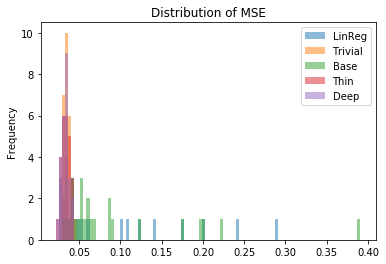

In [77]:
ax = errdf.plot.hist(bins=100, alpha=0.5, title='Distribution of MSE')

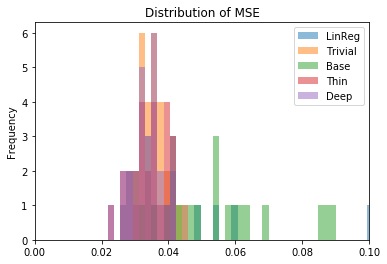

In [80]:
ax = errdf.plot.hist(bins=200, alpha=0.5, title='Distribution of MSE', xlim=(0,0.1))

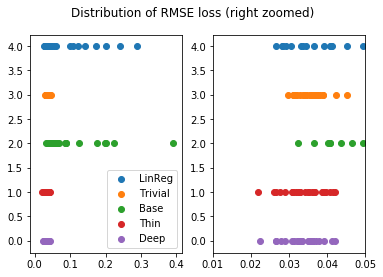

In [88]:
labels = np.zeros(len(lnrg))
labels = np.stack([labels, labels+1, labels+2, labels+3, labels+4])

ax1 = plt.subplot(121)
ax1.scatter(lnrg, labels[4], label='LinReg')
ax1.scatter(triv, labels[3], label='Trivial')
ax1.scatter(base, labels[2], label='Base')
ax1.scatter(thin, labels[1], label='Thin')
ax1.scatter(deep, labels[0], label='Deep')
plt.legend()

ax2 = plt.subplot(122)
ax2.scatter(lnrg, labels[4], label='LinReg')
ax2.scatter(triv, labels[3], label='Trivial')
ax2.scatter(base, labels[2], label='Base')
ax2.scatter(thin, labels[1], label='Thin')
ax2.scatter(deep, labels[0], label='Deep')
ax2.set_xlim([0.01, 0.05])

plt.suptitle('Distribution of RMSE loss (right zoomed)')
plt.show()

# Discussion of performance

This analysis gives that percent error of the prediction for the network solution tended to be in about the 10% error range. The networks provided a much larger increase in performance accuracy compared to a linear regression, and the introduction, and was seemingly able to capture the information of the data set better since it outperformaed the trivial predictor roughly half of the time.

The error margin is still rather large, but this is perhaps due to not only an error in the computational power of the networks but also a general failiure of the model to capture all data. For instance, the linear regression used to determine the "infection rate" $r$ within each state was not perfect. Each computation of the rate had been subject to a varied number of data points (since the infection started at different times).

Furthermore, the varying fidelity of the underlying model as an exponential growth (while not too incorrect within the first half of the data set) is not always correct, especially with the generally small amount of data to fit to (especially in states where infection rates are small and stochastic noise can be significant on the fit), or states wehre the infection started very early on (and quarantine measures had already started taking effect before April 12). Beyond the model likely being too simplistic, the data used to train was not necessarily representative of the whole picture. For isntance, the attitude of residents might be more significant, regardless of the state-level action, and yet could not be caputred as data for the model. 

In general, the performance of the network shows that it had the capability to capture the information associated with the outlier data points better than a trivial prediciton (where the outliers are much more significant) or linear regression. I think the large margin of error that the network produces boils down to several sources:
1. The model was overly simplistic: exponential growth does not necessarily model the system exactly.
2. The data was not complete: I only captured a small subset of actions that the state governments could hve taken. It is liekly that there are many other factors that could not be caputred directly and were not taken into account.
3. The data was limited to a small size: there may not have been enough data to properly fit to the model. Truly outlier data (due to the stochastic nature of such systems) appears much more significantly in such a small data set of only 51 points.

To that end, it is likely that the network was undertrained, primarily in the sense that it had not been given enough information to begin with to properly "learn" all features of the dataset. Given the dataset provided, it is clear that the network was more than capable of reaching a global minimum in the loss function landscape, but the issue with the model is that the loss function profile (on all the data) was just not a completely accurate representation of what the data really is.